# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sqlalchemy import URL
from sqlalchemy import text
from urllib.parse import quote_plus
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# create MySql URL

In [6]:
url_object = URL.create(
    "mysql+mysqlconnector",
    username="root",
    password="",
    host="localhost"
    )

# create Engine

In [7]:
engin = create_engine(url_object)

# Feach the Required DATA

In [39]:
query = ("SELECT o.`Order ID` AS `Order ID`, "
         "o.`Order Priority` AS `Order Priority`, "
         "o.Market AS Market, "
         "od.Sales AS Sales, "
         "od.Quantity AS Quantity, "
         "od.`Shipping Cost` AS `Shipping Cost`, "
         "od.`Discount` AS Discount, "
         "s.City AS City, "
         "s.State AS State, "
         "s.Country AS Country, "
         "s.Region AS Region, "
         "p.Category AS 'product category', "
         "s.`Ship Mode` AS `Ship Mode` "
         "FROM `order` o "
         "JOIN shipping s on o.`Order ID` = s.`Order ID` "
         "JOIN order_detail od on o.`Order ID` = od.`Order ID` "
         "JOIN product p on p.`Product ID` = od.`Product ID`;")
         

In [40]:
with engin.connect() as conn:
    conn.execute(text("USE SuperStore"))
    df = pd.read_sql(text(query), conn)

In [41]:
df.head() 

,Order ID,Order Priority,Market,Sales,Quantity,Shipping Cost,Discount,City,State,Country,Region,product category,Ship Mode
0,AE-2011-9160,Medium,EMEA,78.408,6,3.87,0.7,Ajman,'Ajman,United Arab Emirates,EMEA,Technology,Standard Class
1,AE-2011-9160,Medium,EMEA,82.674,2,5.69,0.7,Ajman,'Ajman,United Arab Emirates,EMEA,Office Supplies,Standard Class
2,AE-2013-1130,High,EMEA,4.248,1,0.10,0.7,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,EMEA,Office Supplies,Same Day
3,AE-2013-1130,High,EMEA,224.748,6,60.08,0.7,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,EMEA,Furniture,Same Day
4,AE-2013-1530,High,EMEA,6.966,1,1.75,0.7,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,EMEA,Office Supplies,Second Class


# DATA Information

In [42]:
np.shape(df)

(49670, 13)

In [43]:
print(df.dtypes)

Order ID             object
Order Priority       object
Market               object
Sales               float64
Quantity              int64
Shipping Cost       float64
Discount            float64
City                 object
State                object
Country              object
Region               object
product category     object
Ship Mode            object
dtype: object


In [44]:
df.isnull().sum()

Order ID            0
Order Priority      0
Market              0
Sales               0
Quantity            0
Shipping Cost       0
Discount            0
City                0
State               0
Country             0
Region              0
product category    0
Ship Mode           0
dtype: int64

In [45]:
np.unique(df['Market'])

array(['APAC', 'Africa', 'Canada', 'EMEA', 'EU', 'LATAM', 'US'],
      dtype=object)

In [46]:
len(np.unique(df['City']))

3590

In [47]:
len(np.unique(df['State']))

1089

In [48]:
len(np.unique(df['Country']))

147

In [49]:
np.unique(df['Region']) 

array(['Africa', 'Canada', 'Caribbean', 'Central', 'Central Asia', 'EMEA',
       'East', 'North', 'North Asia', 'Oceania', 'South',
       'Southeast Asia', 'West'], dtype=object)

In [50]:
len(np.unique(df['Ship Mode']))

4

In [51]:
labels=df['Ship Mode'].value_counts()

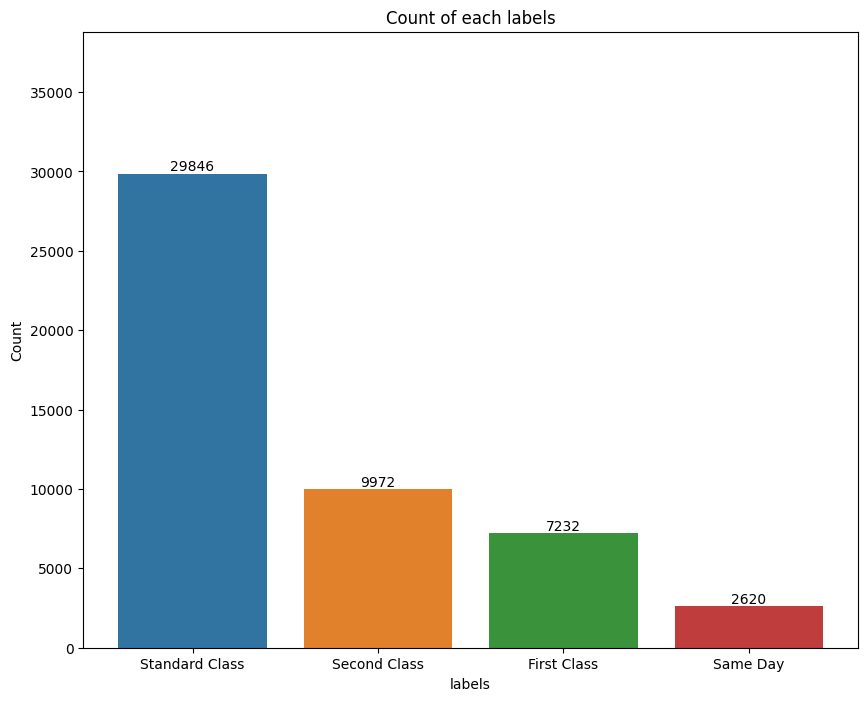

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=labels.index,y=labels.values, ax=ax)

ax.bar_label(ax.containers[0], label_type='edge')

ax.margins(y=0.3, x=0.05)
plt.xlabel('labels')
plt.ylabel('Count')
plt.title('Count of each labels')
plt.show()

# DATA Preprocessing

In [53]:
df.head()

,Order ID,Order Priority,Market,Sales,Quantity,Shipping Cost,Discount,City,State,Country,Region,product category,Ship Mode
0,AE-2011-9160,Medium,EMEA,78.408,6,3.87,0.7,Ajman,'Ajman,United Arab Emirates,EMEA,Technology,Standard Class
1,AE-2011-9160,Medium,EMEA,82.674,2,5.69,0.7,Ajman,'Ajman,United Arab Emirates,EMEA,Office Supplies,Standard Class
2,AE-2013-1130,High,EMEA,4.248,1,0.10,0.7,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,EMEA,Office Supplies,Same Day
3,AE-2013-1130,High,EMEA,224.748,6,60.08,0.7,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,EMEA,Furniture,Same Day
4,AE-2013-1530,High,EMEA,6.966,1,1.75,0.7,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,EMEA,Office Supplies,Second Class


In [54]:
Priority_le = LabelEncoder()
Market_le = LabelEncoder()
city_le = LabelEncoder()
state_le = LabelEncoder()
Country_le = LabelEncoder()
Region_le = LabelEncoder()
product_category = LabelEncoder()
#Ship_Mode = LabelEncoder()

In [55]:
df['Order Priority'] = Priority_le.fit_transform(df['Order Priority'])
df['Market'] = Market_le.fit_transform(df['Market'])
df['City'] = city_le.fit_transform(df['City'])
df['State'] = state_le.fit_transform(df['State'])
df['Country'] = Country_le.fit_transform(df['Country'])
df['Region'] = Region_le.fit_transform(df['Region'])
df['product category'] = product_category.fit_transform(df['product category'])
#df['Ship Mode'] = Ship_Mode.fit_transform(df['Ship Mode'])

In [56]:
df.head()

,Order ID,Order Priority,Market,Sales,Quantity,Shipping Cost,Discount,City,State,Country,Region,product category,Ship Mode
0,AE-2011-9160,3,3,78.408,6,3.87,0.7,41,0,137,5,2,Standard Class
1,AE-2011-9160,3,3,82.674,2,5.69,0.7,41,0,137,5,1,Standard Class
2,AE-2013-1130,1,3,4.248,1,0.10,0.7,2635,821,137,5,1,Same Day
3,AE-2013-1130,1,3,224.748,6,60.08,0.7,2635,821,137,5,0,Same Day
4,AE-2013-1530,1,3,6.966,1,1.75,0.7,2635,821,137,5,1,Second Class


In [57]:
df.drop(['Order ID'], axis=1, inplace=True)

In [58]:
print(df.dtypes)

Order Priority        int64
Market                int64
Sales               float64
Quantity              int64
Shipping Cost       float64
Discount            float64
City                  int64
State                 int64
Country               int64
Region                int64
product category      int64
Ship Mode            object
dtype: object


In [59]:
df.head(10)

,Order Priority,Market,Sales,Quantity,Shipping Cost,Discount,City,State,Country,Region,product category,Ship Mode
0,3,3,78.408,6,3.87,0.7,41,0,137,5,2,Standard Class
1,3,3,82.674,2,5.69,0.7,41,0,137,5,1,Standard Class
2,1,3,4.248,1,0.10,0.7,2635,821,137,5,1,Same Day
3,1,3,224.748,6,60.08,0.7,2635,821,137,5,0,Same Day
4,1,3,6.966,1,1.75,0.7,2635,821,137,5,1,Second Class
5,1,3,16.668,2,1.41,0.7,2635,821,137,5,1,Second Class
6,0,3,42.480,1,8.04,0.7,41,0,137,5,1,First Class
7,3,3,77.256,8,4.08,0.7,2635,821,137,5,1,Standard Class
8,3,3,3.159,1,0.25,0.7,2635,821,137,5,1,Standard Class
9,3,3,59.373,1,5.83,0.7,2635,821,137,5,1,Standard Class


/tmp/ipykernel_13295/23258324.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr() * 100


[Text(0.5, 1.0, 'Correlation matrix of order dataset')]

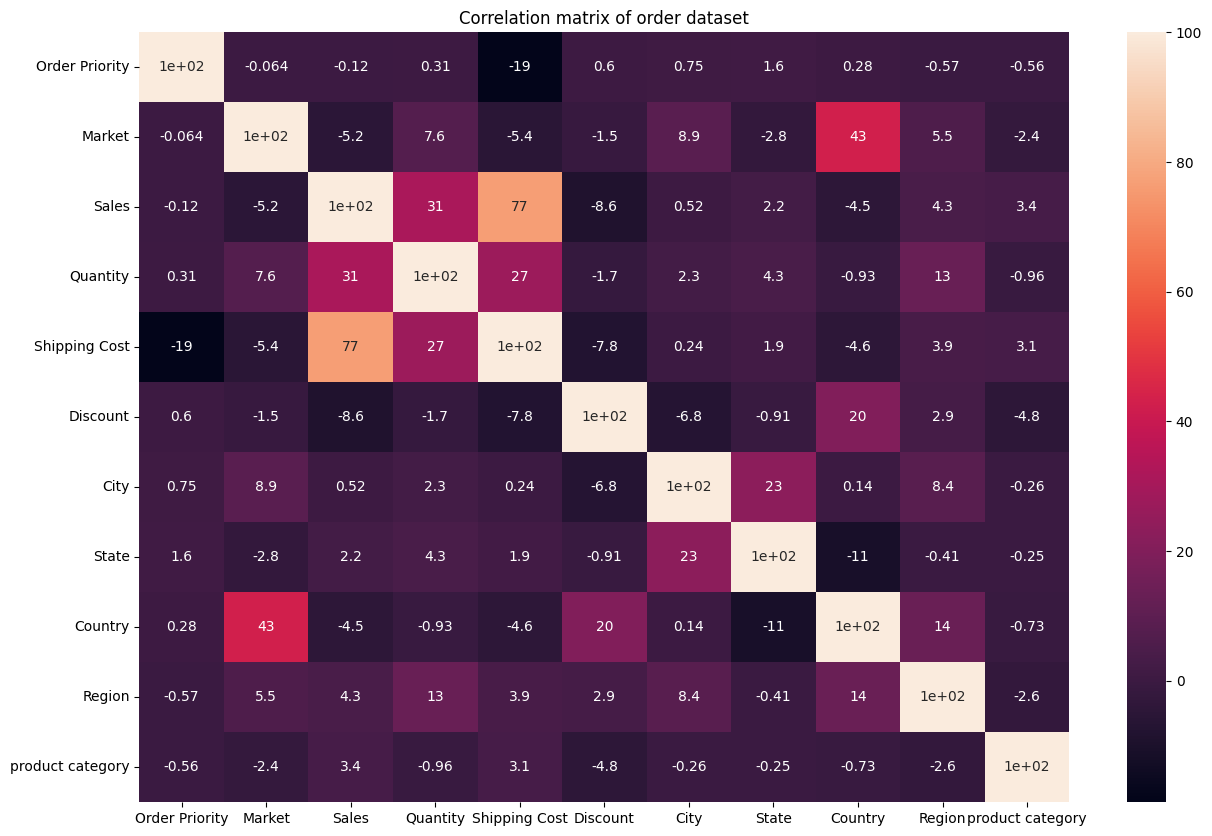

In [60]:
correlation = df.corr() * 100
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(correlation, annot = True)  
heatmap.set(title ="Correlation matrix of order dataset")

In [61]:
X = df.drop(['Ship Mode'], axis=1)
y = df['Ship Mode'] 

In [62]:
discrete_features_index=list(np.arange(1,10))
feature_importance=mutual_info_classif(X=X,y=y,discrete_features=discrete_features_index, random_state=2233)
feature_importance = pd.DataFrame(data=feature_importance,columns=['fi'])
feature_importance.index=X.columns
feature_importance.sort_values(by=['fi'] , ascending=False, inplace=True)

/home/masoud533/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/masoud533/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/masoud533/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [63]:
feature_importance

,fi
Sales,0.550573
Shipping Cost,0.438250
City,0.229477
Order Priority,0.143793
State,0.079216
Country,0.011828
product category,0.001967
Discount,0.001667
Region,0.001444
Market,0.000454


In [64]:
df.head()

,Order Priority,Market,Sales,Quantity,Shipping Cost,Discount,City,State,Country,Region,product category,Ship Mode
0,3,3,78.408,6,3.87,0.7,41,0,137,5,2,Standard Class
1,3,3,82.674,2,5.69,0.7,41,0,137,5,1,Standard Class
2,1,3,4.248,1,0.10,0.7,2635,821,137,5,1,Same Day
3,1,3,224.748,6,60.08,0.7,2635,821,137,5,0,Same Day
4,1,3,6.966,1,1.75,0.7,2635,821,137,5,1,Second Class


In [65]:
df.to_csv('dataFrame.csv')